# Predicting Car Prices using K-Nearest Neighbors

In this project, I practice the machine learning workflow I've learned so far to predict a car's market price using its attributes. This is a guided project courtesy of direction from dataquest.io. The data set used here contains information on various cars. For each car there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More about the data set here (https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from here (https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [73]:
# Importing required libraries for data handling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# Reading in the dataset and peeking a view 
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The dataset does not contain headings for its columns so the headings have been gathered from its source website (UCI repository) and read into the dataset using the available arguments in the read_csv function. 

In [75]:
# Column names sourced from https://archive.ics.uci.edu/ml/datasets/automobile
names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data',header=None, names=names)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [76]:
numeric = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_words = ['num_of_doors', 'num_of_cylinders']

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Some numeric columns such as normalized_losses, bore, stroke, horsepower, peak_rpm and price have been classified as object columns due to the presence of absurd string values. So these columns must be cleaned. 

## Data cleaning

In [77]:
# Viewing missing/invalid values in the 'normalized_losses' column 
cars['normalized_losses'].value_counts(normalize=True)

?      0.200000
161    0.053659
91     0.039024
150    0.034146
104    0.029268
134    0.029268
128    0.029268
102    0.024390
168    0.024390
94     0.024390
95     0.024390
74     0.024390
103    0.024390
65     0.024390
85     0.024390
118    0.019512
93     0.019512
122    0.019512
106    0.019512
148    0.019512
137    0.014634
115    0.014634
101    0.014634
125    0.014634
154    0.014634
83     0.014634
145    0.009756
113    0.009756
192    0.009756
108    0.009756
129    0.009756
158    0.009756
89     0.009756
87     0.009756
119    0.009756
188    0.009756
153    0.009756
194    0.009756
110    0.009756
81     0.009756
164    0.009756
197    0.009756
256    0.004878
90     0.004878
186    0.004878
142    0.004878
231    0.004878
78     0.004878
121    0.004878
98     0.004878
107    0.004878
77     0.004878
Name: normalized_losses, dtype: float64

In the normalized_losses column, twenty percent of the values are unspecified with "?". These are the ways to approach handling this column:

1. Replace the missing values using the average values from that column.
2. Drop the rows entirely (especially if other columns in those rows have missing values).
3. Drop the column entirely.

Applying method 1 is only valid for those cases where the proportion of missing values is preferably smaller than 10 %, otherwise large errors may be introduced. To check the option of method 2, the rows containing "?" can be visually inspected as there are only 41 rows.

In [78]:
cars[cars['normalized_losses'] == "?"]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [79]:
cars[cars['normalized_losses'] == "?"].isnull()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As can be seen, many of these rows do contain valid values in other columns, so they cannot be dropped. The only option is method 3, which is to drop the 'normalized_values' columns entirely. This approach can be taken also because there are many other cleaner numeric columns available. 

In [80]:
# Dropping the column 'normalized_losses'
cars.drop(labels=['normalized_losses'], axis=1, inplace=True)

In [81]:
# Viewing values of the column num_of_doors
cars['num_of_doors'].value_counts()

four    114
two      89
?         2
Name: num_of_doors, dtype: int64

In [82]:
cars[cars['num_of_doors'] == "?"]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


Looking at similar models of the above brands (http://www.qaars.com/n/Dodge/Neon/2003--Dodge--Neon--SRT-4--4dr--Sedan--(2.4L--4cyl--Turbo--5M)/) and considering the lengths of these vehicles indicate that the 'num_of_doors' values in these cases should be four.

In [83]:
cars.loc[[27, 63], 'num_of_doors'] = 'four' 

In [84]:
# Looking at the values in the 'num_of_cylinders' column
cars['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [85]:
# Converting number values in words in the columns num_of_doors and num_of_cylinders
word_to_num = {
    'two' : 2,
    'three' : 3,
    'four' : 4,
    'five' : 5,
    'six' : 6,
    'eight' : 8,
    'twelve' : 12
}

In [86]:
cars[['num_of_doors', 'num_of_cylinders']] = cars[['num_of_doors', 'num_of_cylinders']].applymap(func=lambda x: word_to_num[x])

In [87]:
cars[['num_of_doors', 'num_of_cylinders']].isnull().sum()

num_of_doors        0
num_of_cylinders    0
dtype: int64

In [88]:
cars[['num_of_doors', 'num_of_cylinders']].dtypes

num_of_doors        int64
num_of_cylinders    int64
dtype: object

In [89]:
# Looking at the columns 'bore'
cars['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.43     8
3.78     8
3.31     8
3.27     7
2.91     7
3.05     6
3.58     6
3.39     6
3.54     6
3.70     5
3.01     5
3.35     4
?        4
3.74     3
3.59     3
3.17     3
3.50     2
3.63     2
3.80     2
3.24     2
3.13     2
3.94     2
3.33     2
3.47     2
3.08     1
2.92     1
2.68     1
2.54     1
3.60     1
3.61     1
3.76     1
2.99     1
3.34     1
Name: bore, dtype: int64

Since only 4 values have this "?" value, they will be replaced with the mean value of the valid bore values in the column.

In [90]:
# Replacing "?" values in the 'bore' column
cars['bore'] = cars['bore'].replace('?', np.nan)
cars[cars['bore'].isnull()]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,?,9.4,135,6000,16,23,15645


The only values of the 'bore' column which are missing also have missing 'stroke' values. Also, these values are missing for cars of the Mazda make which are of hatchback type. So, if there are other rows containing similar data, these values can be filled in using data from those full rows.

In [91]:
cars[(cars['body_style'] == 'hatchback') & (cars['make'] == 'mazda')]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,mazda,gas,std,2,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,mazda,gas,std,2,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,mazda,gas,std,2,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
55,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,?,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,?,9.4,135,6000,16,23,15645
59,1,mazda,gas,std,2,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845
61,1,mazda,gas,std,2,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
64,0,mazda,gas,std,4,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245


In [92]:
# Replacing NaN and '?' values in 'bore' and 'stroke' columns using mean of neighbor data
cars['bore'].replace(np.nan, 3.21, inplace=True)
cars['stroke'].replace('?', 3.27, inplace=True)

In [93]:
# Checking column type for the 'bore' column and checking presence of null values
print(cars['bore'].dtype, '\n')
print(cars[cars['bore'] == np.NaN])

object 

Empty DataFrame
Columns: [symboling, make, fuel_type, aspiration, num_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, num_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

[0 rows x 25 columns]


In [94]:
# Casting the 'bore' column to float type
cars['bore'] = cars['bore'].astype('float')
cars['bore'].values

array([3.47, 3.47, 2.68, 3.19, 3.19, 3.19, 3.19, 3.19, 3.13, 3.13, 3.5 ,
       3.5 , 3.31, 3.31, 3.31, 3.62, 3.62, 3.62, 2.91, 3.03, 3.03, 2.97,
       2.97, 3.03, 2.97, 2.97, 2.97, 3.03, 3.34, 3.6 , 2.91, 2.91, 2.91,
       2.91, 2.91, 2.91, 2.92, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.31,
       3.03, 3.03, 3.43, 3.63, 3.63, 3.54, 3.03, 3.03, 3.03, 3.03, 3.08,
       3.21, 3.21, 3.21, 3.21, 3.39, 3.39, 3.39, 3.39, 3.39, 3.39, 3.76,
       3.43, 3.58, 3.58, 3.58, 3.58, 3.46, 3.46, 3.8 , 3.8 , 3.78, 2.97,
       2.97, 2.97, 3.03, 3.17, 3.35, 3.58, 3.59, 3.59, 3.35, 3.35, 3.17,
       3.17, 3.15, 2.99, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15,
       3.33, 3.33, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.46, 3.7 , 3.46,
       3.7 , 3.46, 3.7 , 3.46, 3.7 , 3.46, 3.7 , 3.61, 2.97, 3.03, 2.97,
       2.97, 2.97, 3.35, 3.59, 3.94, 3.74, 3.74, 3.74, 3.94, 3.46, 3.46,
       3.54, 3.54, 2.54, 3.54, 3.54, 3.54, 3.62, 3.62, 3.62, 3.62, 3.62,
       3.62, 3.62, 3.62, 3.62, 3.62, 3.62, 3.62, 3.

In [95]:
# Checking the 'stroke' column for invalid string values
cars['stroke'].value_counts()

3.40    20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.11     6
3.27     6
3.41     6
3.50     6
3.07     6
3.58     6
3.19     6
3.52     5
3.64     5
3.27     4
3.86     4
3.54     4
3.47     4
3.90     3
2.90     3
2.19     2
3.08     2
3.10     2
2.68     2
4.17     2
2.80     2
3.16     1
2.07     1
2.76     1
2.36     1
3.21     1
3.12     1
2.87     1
Name: stroke, dtype: int64

In [96]:
# Casting stroke column as float
cars['stroke'] = cars['stroke'].astype('float')

In [97]:
# Examining the 'horsepower' column for anomalies
cars['horsepower'].describe()

count     205
unique     60
top        68
freq       19
Name: horsepower, dtype: object

In [98]:
cars['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
88      6
101     6
62      6
97      5
102     5
84      5
82      5
145     5
76      5
92      4
86      4
111     4
123     4
182     3
207     3
90      3
121     3
85      3
152     3
73      3
56      2
52      2
176     2
184     2
94      2
162     2
100     2
156     2
161     2
155     2
112     2
?       2
134     1
200     1
142     1
64      1
55      1
143     1
58      1
154     1
78      1
72      1
48      1
60      1
115     1
120     1
135     1
288     1
262     1
175     1
106     1
140     1
Name: horsepower, dtype: int64

In [99]:
cars[cars['horsepower'] == '?']

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [100]:
cars[(cars['make'] == 'renault')]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


These rows containing data of cars of the Renault make do not any similar data points, nor can any information regarding these models be found online, so these rows will be dropped.

In [101]:
cars.drop([130,131],inplace=True)

In [102]:
cars[cars['horsepower'].isnull()]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [103]:
cars['horsepower'].dtype

dtype('O')

In [104]:
cars['horsepower'] = cars['horsepower'].astype('int')

In [105]:
# Checking the 'peak_rpm' column for anomalies
cars['peak_rpm'].describe()

count      203
unique      23
top       5500
freq        37
Name: peak_rpm, dtype: object

In [106]:
cars[cars['peak_rpm'] == np.nan]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [107]:
cars[cars['peak_rpm'] == '?']

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [108]:
cars['peak_rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
4200     5
4150     5
4750     4
4350     4
4400     3
5100     3
4250     3
5900     3
6600     2
5600     1
4650     1
5300     1
4900     1
5750     1
Name: peak_rpm, dtype: int64

In [109]:
cars['peak_rpm'] = cars['peak_rpm'].astype('int')

In [110]:
# Examining the 'price' column
cars['price'].describe()

count     203
unique    185
top         ?
freq        4
Name: price, dtype: object

In [111]:
cars['price'].value_counts()

?        4
8921     2
8845     2
16500    2
7609     2
6229     2
7775     2
6692     2
18150    2
5572     2
13499    2
7957     2
8495     2
7295     2
7898     2
9279     2
7395     1
28176    1
23875    1
5195     1
6338     1
18399    1
11248    1
9549     1
7788     1
7463     1
11694    1
14399    1
8948     1
22625    1
        ..
7499     1
18950    1
16845    1
28248    1
8249     1
6575     1
20970    1
17950    1
12290    1
5399     1
9960     1
15510    1
7053     1
13860    1
7126     1
12940    1
34028    1
8013     1
9980     1
18620    1
13495    1
7689     1
16503    1
16695    1
8195     1
6695     1
9639     1
15250    1
9298     1
9233     1
Name: price, Length: 185, dtype: int64

In [112]:
cars[cars['price'] == '?']

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,isuzu,gas,std,2,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,isuzu,gas,std,4,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


Since the values in the 'price' column are to be predicted, the four rows for which the values do not exist will be set aside. Then the machine learning model will run this new data and output predicted prices.

In [113]:
cars_unknown_prices = cars[cars['price'] == '?'].copy()
cars = cars[cars['price'] != '?'].copy()

In [114]:
#Checking data type of the 'price' column and fixing if necessary
cars['price'].dtype

dtype('O')

In [115]:
cars['price'] = cars['price'].astype('int')

In [116]:
# Viewing final size after cleaning
cars.shape

(199, 25)

In [117]:
# Combining all numeric columns and setting last place for the target ('price') column
numeric.remove('price')
numeric.append('num_of_doors')
numeric.append('num_of_cylinders')
numeric.append('price')
numeric.remove('normalized_losses')
# Normalizing the numeric columns from 0 to 1
cars_num_norm = cars[numeric].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
cars_num_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 17 columns):
symboling            199 non-null float64
wheel_base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb_weight          199 non-null float64
engine_size          199 non-null float64
bore                 199 non-null float64
stroke               199 non-null float64
compression_ratio    199 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             199 non-null float64
highway_mpg          199 non-null float64
num_of_doors         199 non-null float64
num_of_cylinders     199 non-null float64
price                199 non-null float64
dtypes: float64(17)
memory usage: 28.0 KB


In [118]:
cars_num_norm

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,num_of_doors,num_of_cylinders,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,0.0,0.2,0.207959
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,0.0,0.2,0.282558
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,0.0,0.4,0.282558
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,1.0,0.2,0.219254
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,1.0,0.3,0.306142
5,0.8,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,0.0,0.3,0.251527
6,0.6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,1.0,0.3,0.312596
7,0.6,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,1.0,0.3,0.342634
8,0.6,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,1.0,0.3,0.465642
10,0.8,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,0.0,0.2,0.280820


## Exploratory Data Analysis
Since there are 16 numeric features, which features are more connected to the price of the air must be deduced. Not all strong correlations are important, and some can be confounding. 

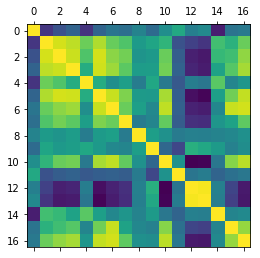

In [119]:
plt.matshow(cars_num_norm.corr())

According to the correlation plot above, the signed values of correlations decreases from the color yellow to the color greenish blue(positively) and decreases further to the color dark blue / violet. Strong negative correlations are also to be considered significant factors. As the 'price' column is numbered 16, it indicates that it correlates strongly with columns indexed at 6 (+ve), 12 (-ve) and 13 (-ve). It also has mildly strong correlations with the columns indexed at 1 (+ve), 2 (+ve), 3 (+ve), 5 (+ve), 10 (+ve) and 15 (+ve).  

In [120]:
correlations = cars_num_norm.corr()
correlations

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,num_of_doors,num_of_cylinders,price
symboling,1.000000,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.156413,-0.009400,-0.182446,0.076038,0.280635,-0.035228,0.036293,-0.669781,-0.118031,-0.082465
wheel_base,-0.537706,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.500716,0.170381,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.447363,0.347946,0.583797
length,-0.365957,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.610889,0.117915,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.396244,0.442442,0.693965
width,-0.243933,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.543984,0.186300,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.229666,0.521779,0.753871
height,-0.546717,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.198421,-0.056013,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.533762,0.006518,0.134990
curb_weight,-0.232893,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.646464,0.172267,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.208358,0.604626,0.835090
engine_size,-0.111110,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.583287,0.206561,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.024404,0.848635,0.873887
bore,-0.156413,0.500716,0.610889,0.543984,0.198421,0.646464,0.583287,1.000000,-0.067216,0.004782,0.564933,-0.283742,-0.568514,-0.581021,0.130830,0.224251,0.545776
stroke,-0.009400,0.170381,0.117915,0.186300,-0.056013,0.172267,0.206561,-0.067216,1.000000,0.199549,0.100061,-0.063530,-0.028821,-0.037411,-0.005902,0.018753,0.093658
compression_ratio,-0.182446,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,0.004782,0.199549,1.000000,-0.214576,-0.436015,0.330587,0.268819,0.169623,-0.019429,0.069549


In [121]:
correlations['price'].abs()[correlations['price'].abs() > 0.5]

wheel_base          0.583797
length              0.693965
width               0.753871
curb_weight         0.835090
engine_size         0.873887
bore                0.545776
horsepower          0.810533
city_mpg            0.689253
highway_mpg         0.705230
num_of_cylinders    0.708236
price               1.000000
Name: price, dtype: float64

On the basis of the above exploration, the following features will be used for training in this order of significance: engine_size, curb_weight, horsepower, width, highway_mpg, length, city_mpg, wheel_base and bore.

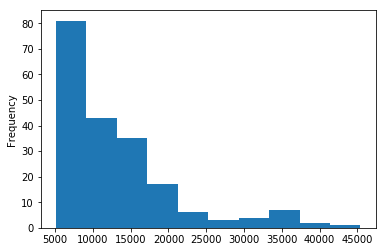

In [122]:
cars['price'].plot.hist()

The price column is unsurprisingly, a right tailed distribution.

## Applying the K-nearest neighbors algorithm

In [123]:
features = ['engine_size', 'curb_weight', 'horsepower', 'width', 'highway_mpg', 'length', 'city_mpg', 'wheel_base', 'bore']

### Univariate Model

In [124]:
# Importing required functions, devising a complete function to prepare 75/25 training and test sets, apply the algorithm and return error metrics 
import math 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(1)
def knn_train_test(feature, target, df):
    limit = math.floor(len(df) * 0.75)
    df = df.iloc[np.random.permutation(len(df))]
    train = df.iloc[:limit]
    test = df.iloc[limit:]
    knn = KNeighborsRegressor() # Number of neighbors initially set to default of 5
    knn.fit(train[[feature]], train[target])
    predictions = knn.predict(test[[feature]])
    rmse = math.sqrt(mean_squared_error(test[target], predictions))
    return rmse

In [125]:
# Performing analyses for all features, one by one, with five nearest neighbors in each case  
rmse_one_var_k_5 = []
for feature in features:
    rmse_one_var_k_5.append(knn_train_test(feature , 'price', cars_num_norm))
rmse_one_var_k_5

[0.07010039310220899,
 0.09453035742050689,
 0.10486006828729365,
 0.10646128301042694,
 0.12843848392490548,
 0.16160474853127316,
 0.13762954326210755,
 0.10120459099215175,
 0.1298758814363279]

<BarContainer object of 9 artists>

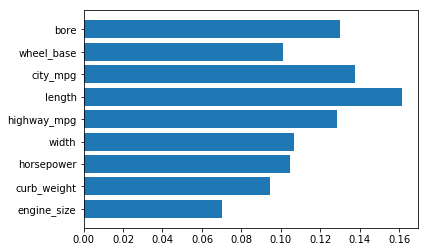

In [126]:
plt.barh(features, rmse_one_var_k_5)

The errors resulting from using a kNN algorithm with only one feature at a time range from 7% to 16% of the price range. The least error came from the model trained on the 'engine_size' feature. Accuracy may be further improved by tweaking number of neighbors or using more features. 

In [127]:
# Altering the function to include input of number of neighbors
def knn_train_test(feature, target, df, k):
    limit = math.floor(len(df) * 0.75)
    df = df.iloc[np.random.permutation(len(df))]
    train = df.iloc[:limit]
    test = df.iloc[limit:]
    knn = KNeighborsRegressor(n_neighbors=k) # Number of neighbors initially set to default of 5
    knn.fit(train[[feature]], train[target])
    predictions = knn.predict(test[[feature]])
    rmse = math.sqrt(mean_squared_error(test[target], predictions))
    return rmse

In [128]:
# Performing analyses for all features, one by one, with different numbers of nearest neighbors in each case 
k_values = [1, 3, 5, 7, 9]
rmse_one_var_many_k = pd.DataFrame(columns=features, index=k_values)
for k in k_values:
    for feature in features:
        rmse = knn_train_test(feature, 'price', cars_num_norm, k)
        rmse_one_var_many_k.loc[k,feature] = rmse
rmse_one_var_many_k

,engine_size,curb_weight,horsepower,width,highway_mpg,length,city_mpg,wheel_base,bore
1,0.0803039,0.16476,0.133625,0.109152,0.147926,0.151485,0.159353,0.124467,0.168716
3,0.0542148,0.127657,0.0838769,0.121125,0.135894,0.106855,0.145273,0.128551,0.186274
5,0.0671069,0.157726,0.0967352,0.12777,0.11416,0.124319,0.123965,0.113307,0.180071
7,0.0841233,0.103422,0.1232,0.121604,0.0995795,0.144095,0.136952,0.149678,0.16197
9,0.125687,0.122515,0.0780733,0.130409,0.10391,0.136549,0.147806,0.131397,0.173367


According to the output above, in almost every case of the number of neighbors, using the feature 'engine_size' yields the lowest error from 5.4% to 12.6%.

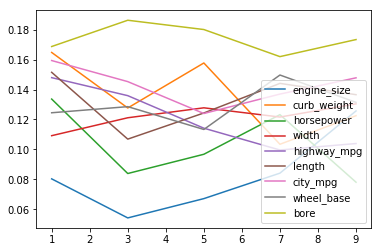

In [129]:
for feature in features:
    plt.plot(rmse_one_var_many_k.index, rmse_one_var_many_k[feature])
plt.legend(loc='lower right')

With most features, the errors decrease as number of neighbors increase from 1 to 3 and then keep steadily rising after. This may indicate that an optimal number of neighbors lies between 2 to 5.

### Multivariate model

In [130]:
# Varying the number of features but keeping neighbors constant at 5 
def knn_train_test(features, target, df, k):
    limit = math.floor(len(df) * 0.75)
    df = df.iloc[np.random.permutation(len(df))]
    train = df.iloc[:limit]
    test = df.iloc[limit:]
    knn = KNeighborsRegressor(n_neighbors=k) # Number of neighbors initially set to default of 5
    knn.fit(train[features], train[target])
    predictions = knn.predict(test[features])
    rmse = math.sqrt(mean_squared_error(test[target], predictions))
    return rmse

rmse_num_features_k_5 = {}
for i in range(1,9):
    rmse_num_features_k_5[i+1] = knn_train_test(features[:i + 1], 'price', cars_num_norm, 5)
rmse_num_features_k_5

{2: 0.06413853070870994,
 3: 0.10937478729799163,
 4: 0.06073547762866536,
 5: 0.08675050746629641,
 6: 0.0766381020281624,
 7: 0.08302346682783357,
 8: 0.13898618921902112,
 9: 0.0940909868134982}

It seems from the dictionary above that the least error occurs while using four features, namely engine_size, curb_weight, horsepower and width atleast for the neighbor value of five. Going further, only three models with the least error (those with 2, 4 and 6 features) will be used for further optimisation. 

### Hyperparameter Tuning

Since the number of neighbors is the primary hyperparameter in this case, it will be varied for each of the three models, from 1 to 25.

In [137]:
k_values = np.arange(1,26)
num_features = [2, 4, 6]
rmses = pd.DataFrame(columns=num_features, index=k_values)

for i in num_features:
    for k in k_values:
        rmses.loc[k, i] = knn_train_test(features[:i + 1], 'price', cars_num_norm, k)
        
rmses

,2,4,6
1,0.068151,0.060454,0.0637825
2,0.0435949,0.0760606,0.0568702
3,0.0445538,0.069637,0.0654468
4,0.101452,0.073194,0.0658198
5,0.0626653,0.0929219,0.0481371
6,0.125837,0.0585477,0.0950465
7,0.0735011,0.0644833,0.124983
8,0.0674351,0.0995135,0.109932
9,0.0925953,0.0782829,0.120123
10,0.10675,0.108816,0.111708


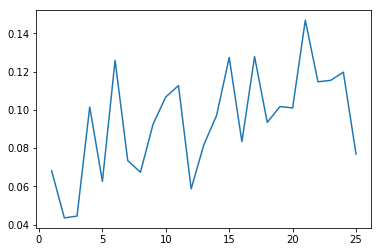

In [139]:
rmses[2].plot()

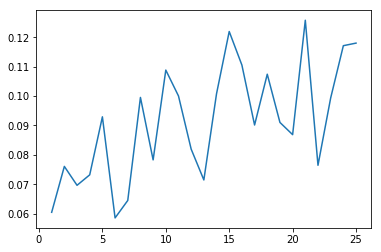

In [140]:
rmses[4].plot()

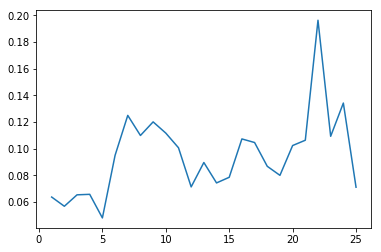

In [141]:
rmses[6].plot()

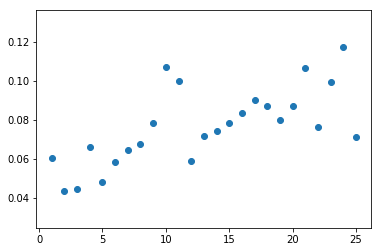

In [142]:
# Plotting the minimum possible rmses for different hyperparameters
plt.scatter(rmses.index.tolist(), rmses.apply(np.min, axis=1))

The least error is 4.4% from a model using 2 features with a k value of 2, atleast when simple train / test validation is used. According to the average rmse by hyperparameter plot above, increasing the k value beyond 10 is counterproductive. 

### Using Cross Validation

In [147]:
# Importing a function useful for cross validation, and performing cross validation for a two feature model with 2 neighbors 
from sklearn.model_selection import cross_val_score, KFold
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor(n_neighbors=2)
    mses = cross_val_score(model, cars_num_norm[features[:2]], cars_num_norm["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  0.06502786550360685 std RMSE:  0.001886341009510409
5 folds:  avg RMSE:  0.07014704272355013 std RMSE:  0.012932385169859707
7 folds:  avg RMSE:  0.06904195455914672 std RMSE:  0.012206721546030972
9 folds:  avg RMSE:  0.06899985071878939 std RMSE:  0.00913848834971573
10 folds:  avg RMSE:  0.06879398784813844 std RMSE:  0.013518330763573732
11 folds:  avg RMSE:  0.06952631719560055 std RMSE:  0.01344610887709456
13 folds:  avg RMSE:  0.06920044197127595 std RMSE:  0.014570076036013126
15 folds:  avg RMSE:  0.06653064003753043 std RMSE:  0.01585663919600544
17 folds:  avg RMSE:  0.06608350400320068 std RMSE:  0.016627064048998386
19 folds:  avg RMSE:  0.06569542280999544 std RMSE:  0.01849232637357798
21 folds:  avg RMSE:  0.0655752600098535 std RMSE:  0.019130359146970068
23 folds:  avg RMSE:  0.0655466907241322 std RMSE:  0.019895602135244404


Three folds are sufficient to provide a model with the least error (considering both the mean and standard deviation values) of avg rmse of 6.5% and std rmse of 0.2 %.   

In [152]:
(cars['price'].max() - cars['price'].min()) * 0.067

2698.8940000000002

In [165]:
# Predicting prices for the unknown cars
knn = KNeighborsRegressor(n_neighbors=2)
unknown_not_norm = cars_unknown_prices[features[:2]].copy()
unknown_norm = (unknown_not_norm - unknown_not_norm.min()) / (unknown_not_norm.max() - unknown_not_norm.min())
knn.fit(cars_num_norm[features[:2]], cars_num_norm["price"])
predict_prices = knn.predict(unknown_norm)
print(predict_prices * (cars['price'].max() - cars['price'].min()) ,cars_unknown_prices['make'].values)

[10349.5   697.    157.  33362. ] ['audi' 'isuzu' 'isuzu' 'porsche']


In [166]:
cars['price'].min()

5118

To some extent, the model is able to significantly distinguish cars models of traditionally higher cost and quality (Audi, Porsche) from a characteristically lower brand (Isuzu). Although values of prices of the Isuzu made models are unrealistically low (observe the minimum value of car price in the cell above), which may stem from the fact that there are no valid training examples with given prices of this make in the dataset.

## Conclusion
The best K-nearest neighbor model resulted from taking only two numerical features into account namely engine size and curb weight. The lowest possible error achievable was approximately 6.3% of the maximum minus minimum range of price, which would account to 2538 dollars approximately. For an interested cat customer or car salesperson trying to value a car that costs below 10000 dollars, this is not a model that performs well, but it could do very well for cars which are more expensive.  